# Credit Scoring Model

In [272]:
import pandas as pd
import numpy as np
 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [273]:
df = pd.read_csv('CreditScoring.csv')

## Data Cleaning

### Review columns and categorical values

In [274]:
# View data
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [275]:
# The above shows us a sample of the data and we first notice that the columns are capitalized so we will normalize those by making them all lowercase.

df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [276]:
# The class we will utilize as our label is "status" which is currently a numerical value and we want to convert that into a string for more clarification into their meaning

status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [277]:
# Do the same for the remaining columns

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)


records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)


job_values = {
    1: 'fixed',
    2: 'parttime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


### Review numerical columns

In [278]:
# Review statistical data

df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [279]:
# The max value of "income", "assets", and "debt" is 99999999.0 which is an anomoly and we discover that this is how empty values were encoded in the initial dataset.
df.loc[df["income"] == 99999999.0]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
29,default,0,unk,48,37,single,no,unk,35,99999999,99999999,99999999,1500,1850
393,default,1,owner,36,52,married,yes,freelance,60,99999999,100000,20000,1500,2340
803,ok,6,parents,24,25,single,no,fixed,35,99999999,5000,0,850,1480
1306,ok,12,owner,36,41,married,no,freelance,60,99999999,10000,0,1000,2100
1420,default,0,owner,60,36,married,yes,freelance,75,99999999,6000,0,1650,1861
1436,ok,5,rent,24,29,married,no,freelance,45,99999999,0,0,800,1197
1455,default,2,owner,36,19,single,yes,freelance,35,99999999,9000,0,500,1100
1472,ok,15,owner,60,40,married,yes,freelance,75,99999999,16000,0,1150,1850
1534,default,1,owner,60,39,married,no,freelance,60,99999999,6000,3000,850,1104
1543,default,10,owner,36,43,married,no,freelance,60,99999999,4500,0,1000,1905


In [280]:
df.loc[df["assets"] == 99999999.0]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
29,default,0,unk,48,37,single,no,unk,35,99999999,99999999,99999999,1500,1850
239,ok,3,unk,24,42,single,no,fixed,35,337,99999999,99999999,1300,1624
734,default,30,owner,18,57,married,yes,freelance,75,290,99999999,0,350,450
1059,ok,6,unk,12,25,single,no,fixed,35,69,99999999,99999999,500,1275
1128,ok,14,owner,60,56,married,yes,freelance,75,150,99999999,0,1000,1104
1669,ok,2,parents,48,20,single,no,fixed,35,318,99999999,0,740,1325
1676,default,4,unk,48,47,married,yes,freelance,45,99999999,99999999,99999999,1350,2172
1811,ok,14,owner,24,50,married,no,fixed,60,92,99999999,99999999,1650,2261
1844,default,1,rent,24,31,separated,no,parttime,41,58,99999999,99999999,200,300
1877,default,12,private,24,28,married,no,fixed,45,102,99999999,99999999,700,1229


In [281]:
df.loc[df["debt"] == 99999999.0]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
29,default,0,unk,48,37,single,no,unk,35,99999999,99999999,99999999,1500,1850
239,ok,3,unk,24,42,single,no,fixed,35,337,99999999,99999999,1300,1624
1059,ok,6,unk,12,25,single,no,fixed,35,69,99999999,99999999,500,1275
1676,default,4,unk,48,47,married,yes,freelance,45,99999999,99999999,99999999,1350,2172
1811,ok,14,owner,24,50,married,no,fixed,60,92,99999999,99999999,1650,2261
1844,default,1,rent,24,31,separated,no,parttime,41,58,99999999,99999999,200,300
1877,default,12,private,24,28,married,no,fixed,45,102,99999999,99999999,700,1229
1892,default,27,owner,18,47,married,yes,freelance,75,0,99999999,99999999,5000,6500
2073,ok,1,private,36,27,married,no,fixed,45,124,99999999,99999999,1300,1636
2236,ok,14,other,48,46,married,no,fixed,60,100,99999999,99999999,800,1651


In [282]:
# An approach to handling missing data is to replace the value with the mean of the column but having the initial values in that calculation will result in an incorrect mean so we want to replace those values with a None value first.

for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999.0, value=np.nan)

df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [283]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [284]:
# Review target label

df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [285]:
# Remove the 1 unknown row

df = df[df.status != 'unk']
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

## Dataset Preparation

Through this section we will:
- Split the dataset into train, validation, and test.
- Handle missing values.
- Use one-hot encoding to encode categorical variables.
- Create the feature matrix X and the target variable y .

In [286]:
# Split data using a 60/20/20 split

from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(
    df_train_full, test_size=0.25, random_state=11)

print("Total Values: " + str(len(df)))
print("Training set: " + str(len(df_train)))
print("Validation set: " + str(len(df_val)))
print("Test set: " + str(len(df_test)))

Total Values: 4454
Training set: 2672
Validation set: 891
Test set: 891


In [287]:
# Create label set for training and val set

y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

In [288]:
# Remove label from dataset

del df_train['status']
del df_val['status']

### Replace missing values
We will take the values we updated to NaN in the previous section and update them to the mean of the columns

In [289]:
train_median_income = df_train["income"].median()
train_median_assets = df_train["assets"].median()
train_median_debt = df_train["debt"].median()

val_median_income = df_val["income"].median()
val_median_assets = df_val["assets"].median()
val_median_debt = df_val["debt"].median()

df_train["income"] = df_train["income"].fillna(train_median_income)
df_train["assets"] = df_train["assets"].fillna(train_median_income)
df_train["debt"] = df_train["debt"].fillna(train_median_income)

df_val["income"] = df_val["income"].fillna(val_median_income)
df_val["assets"] = df_val["assets"].fillna(val_median_income)
df_val["debt"] = df_val["debt"].fillna(val_median_income)

df_train.isna().sum(), df_val.isna().sum()

(seniority    0
 home         0
 time         0
 age          0
 marital      0
 records      0
 job          0
 expenses     0
 income       0
 assets       0
 debt         0
 amount       0
 price        0
 dtype: int64,
 seniority    0
 home         0
 time         0
 age          0
 marital      0
 records      0
 job          0
 expenses     0
 income       0
 assets       0
 debt         0
 amount       0
 price        0
 dtype: int64)

In [290]:
# One-Hot encoding
# Convert the dataframes into a dicitonary
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

print(dict_train)
print(dict_val)

[{'seniority': 10, 'home': 'owner', 'time': 36, 'age': 36, 'marital': 'married', 'records': 'no', 'job': 'freelance', 'expenses': 75, 'income': 0.0, 'assets': 10000.0, 'debt': 0.0, 'amount': 1000, 'price': 1400}, {'seniority': 6, 'home': 'parents', 'time': 48, 'age': 32, 'marital': 'single', 'records': 'yes', 'job': 'fixed', 'expenses': 35, 'income': 85.0, 'assets': 0.0, 'debt': 0.0, 'amount': 1100, 'price': 1330}, {'seniority': 1, 'home': 'parents', 'time': 48, 'age': 40, 'marital': 'married', 'records': 'no', 'job': 'fixed', 'expenses': 75, 'income': 121.0, 'assets': 0.0, 'debt': 0.0, 'amount': 1320, 'price': 1600}, {'seniority': 1, 'home': 'parents', 'time': 48, 'age': 23, 'marital': 'single', 'records': 'no', 'job': 'parttime', 'expenses': 35, 'income': 72.0, 'assets': 0.0, 'debt': 0.0, 'amount': 1078, 'price': 1079}, {'seniority': 5, 'home': 'owner', 'time': 36, 'age': 46, 'marital': 'married', 'records': 'no', 'job': 'freelance', 'expenses': 60, 'income': 100.0, 'assets': 4000.0,

In the past I have used pandas `get_dummies()` method which will generate a new column for each one_hot categorical column but this time I used scikit-learns `DictVectorizer` which is a simpler process where it will vectorize each value and if it a binary class create the columns with 1's and 0's but if it is a numerical column it will output a different number based on its mapping to the column

In [291]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

print(dv.get_feature_names_out())
X_train[0]

['age' 'amount' 'assets' 'debt' 'expenses' 'home=ignore' 'home=other'
 'home=owner' 'home=parents' 'home=private' 'home=rent' 'home=unk'
 'income' 'job=fixed' 'job=freelance' 'job=others' 'job=parttime'
 'job=unk' 'marital=divorced' 'marital=married' 'marital=separated'
 'marital=single' 'marital=unk' 'marital=widow' 'price' 'records=no'
 'records=yes' 'seniority' 'time']


array([3.6e+01, 1.0e+03, 1.0e+04, 0.0e+00, 7.5e+01, 0.0e+00, 0.0e+00,
       1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 1.4e+03, 1.0e+00, 0.0e+00, 1.0e+01,
       3.6e+01])

## Model Training

### Decision Tree

In [292]:
from sklearn.tree import DecisionTreeClassifier

In [293]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [294]:
### Assess performance using AUC
from sklearn.metrics import roc_auc_score

In [295]:
# Evaluate training set predictions
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [296]:
# Evaluate val set predictions
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6532476810927321

In the above two cells we see that the training set was a perfect 100% but when we ran it against the val set it was only 66%. This points us to **Overfitting** where the decision tree memorized each value for each customer during training meaning the model did not **generalize**

To combat this we have to take a model that is too complex and simplify it to force it to **generalize**. We can do this by controlling the size using the `max_depth` parameter which has a default of `none`. 

In [297]:
# Update model to use a max depth of 2

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [298]:
from sklearn.tree import export_text

# Visualize the tree
tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- records=yes <= 0.50
|   |--- job=parttime <= 0.50
|   |   |--- class: False
|   |--- job=parttime >  0.50
|   |   |--- class: True
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



In [299]:
# Review new scores

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('validation auc', auc)

train auc 0.7054989859726213
validation auc 0.6685264343319367


In [300]:
# More parameter tuning. Lets first find the best max_depth 

for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.738
   4 -> 0.759
   5 -> 0.767
   6 -> 0.749
  10 -> 0.653
  15 -> 0.661
  20 -> 0.664
None -> 0.644


In [301]:
# Tune the min leaf size: Minimum number of samples required to split the node

for m in [4, 5, 6]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))

    print()


depth: 4
1 -> 0.759
5 -> 0.759
10 -> 0.759
15 -> 0.763
20 -> 0.760
50 -> 0.755
100 -> 0.754
200 -> 0.745

depth: 5
1 -> 0.767
5 -> 0.768
10 -> 0.762
15 -> 0.765
20 -> 0.764
50 -> 0.766
100 -> 0.763
200 -> 0.757

depth: 6
1 -> 0.747
5 -> 0.750
10 -> 0.758
15 -> 0.770
20 -> 0.761
50 -> 0.762
100 -> 0.769
200 -> 0.766



In [302]:
# Train model with best parameters discovered above

dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

### Random Forest
**Ensemble Learning**: Taking multiple models and combining their outputs into one. Each model will be trained on a different set of features so that their outputs are different.

In [303]:
from sklearn.ensemble import RandomForestClassifier

In [304]:
# specify the number of trees

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [305]:
# Evaluate, and notice the output is different for the next three models of the same size. This is where randomness comes in so we use the random_state parameter to make it more consistant.
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7771033639291856

In [306]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7803849507156524

In [307]:
# Train with a random state of 3

rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=3)

In [308]:
# Evaluate

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7925698094015645

In [310]:
# Evaluate different tree sizes

aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))

    aucs.append(auc)

10 -> 0.793
20 -> 0.801
30 -> 0.808
40 -> 0.812
50 -> 0.814
60 -> 0.811
70 -> 0.812
80 -> 0.814
90 -> 0.813
100 -> 0.814
110 -> 0.814
120 -> 0.816
130 -> 0.816
140 -> 0.816
150 -> 0.816
160 -> 0.817
170 -> 0.817
180 -> 0.818
190 -> 0.818
200 -> 0.819


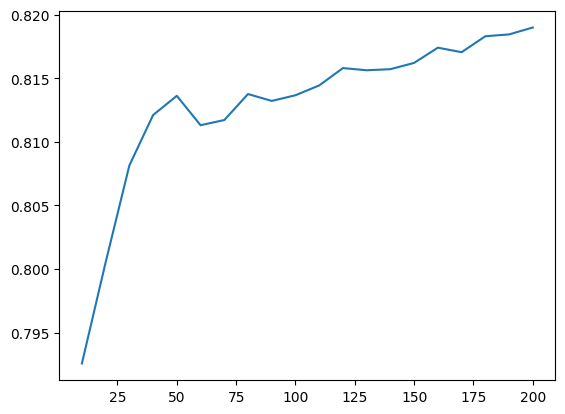

In [311]:
# Plot the results

plt.plot(range(10, 201, 10), aucs)

### Further tuning
Since the random forest consists of multiple decision trees we have the same main parameters to tune the model: `max_depth && min_leaf_size` 

In [312]:
# Review max_depth

all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i,
                                    max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)

    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.792
20 -> 0.796
30 -> 0.798
40 -> 0.798
50 -> 0.800
60 -> 0.802
70 -> 0.802
80 -> 0.804
90 -> 0.804
100 -> 0.804
110 -> 0.805
120 -> 0.806
130 -> 0.808
140 -> 0.807
150 -> 0.807
160 -> 0.806
170 -> 0.806
180 -> 0.806
190 -> 0.806
200 -> 0.806

depth: 10
10 -> 0.786
20 -> 0.805
30 -> 0.807
40 -> 0.813
50 -> 0.816
60 -> 0.818
70 -> 0.816
80 -> 0.816
90 -> 0.817
100 -> 0.817
110 -> 0.819
120 -> 0.819
130 -> 0.820
140 -> 0.820
150 -> 0.819
160 -> 0.819
170 -> 0.819
180 -> 0.821
190 -> 0.821
200 -> 0.822

depth: 20
10 -> 0.778
20 -> 0.795
30 -> 0.806
40 -> 0.814
50 -> 0.816
60 -> 0.816
70 -> 0.815
80 -> 0.817
90 -> 0.818
100 -> 0.818
110 -> 0.819
120 -> 0.819
130 -> 0.820
140 -> 0.821
150 -> 0.820
160 -> 0.821
170 -> 0.820
180 -> 0.820
190 -> 0.820
200 -> 0.819



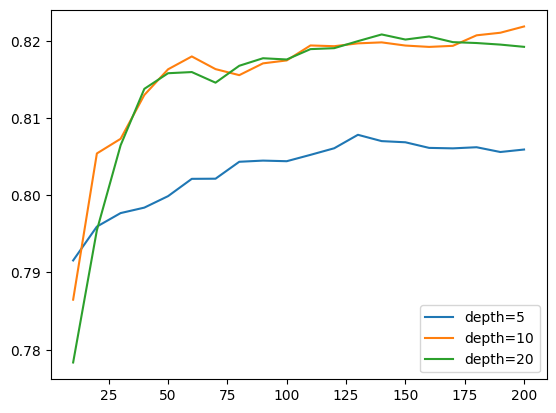

In [313]:
num_trees = list(range(10, 201, 10))
plt.plot(num_trees, all_aucs[5], label='depth=5')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.legend()

In [314]:
# Tune max_sample_leafs

all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(
            n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)

    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.816
30 -> 0.820
50 -> 0.819
70 -> 0.818
90 -> 0.822
110 -> 0.823
130 -> 0.824
150 -> 0.824
170 -> 0.824
190 -> 0.823

min_samples_leaf: 5
10 -> 0.797
30 -> 0.812
50 -> 0.815
70 -> 0.817
90 -> 0.818
110 -> 0.821
130 -> 0.822
150 -> 0.823
170 -> 0.823
190 -> 0.823

min_samples_leaf: 10
10 -> 0.808
30 -> 0.816
50 -> 0.816
70 -> 0.817
90 -> 0.819
110 -> 0.819
130 -> 0.820
150 -> 0.820
170 -> 0.819
190 -> 0.819



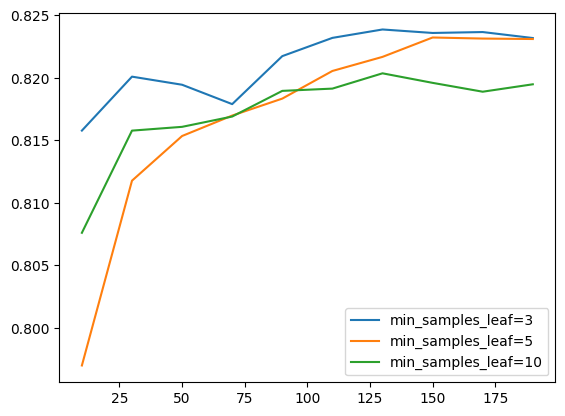

In [315]:
num_trees = list(range(10, 201, 20))
plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10')
plt.legend()

In [316]:
# Train final model

rf = RandomForestClassifier(
    n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)

### Gradient Boosting